## **Problem Statement**
* Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.


---



### **Domain Analysis**

1. Airline:  So this column will have all the types of airlines like as --
['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
'Vistara Premium economy', 'Jet Airways Business',
'Multiple carriers Premium economy', 'Trujet']

2. Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.

3. Source: This column holds the name of the place from where the passenger’s journey will start. we have 5 places where the passenger's starts their journey as ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

4.	Destination: This column holds the name of the place to where passengers wanted to travel like ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

5.	Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination. In this column route is denoted as airline code like [BLR-Bangalore, DEL-Delhi, IXR-Ranchi, BBI-Bhuvaneshwar, LKO-Lacknow,
BOM-Bombay, COK-Kochi, NAG-Nagpur, VGA-Vijayawada, VNS-Varanasi, CCU-Kolkatta,AMD-Ahmdabad, HYD-Hydrabad, JDH-Jodhpur, JAI-Jaipur, MAA-Chennai, IDR-Indor,STV-Surat, PNQ-Pune, BDQ-Vadodara, GOI-Goa, TRV-Thiruvananthapuram, HBX-HUBBALLI, VIZ-Visakhapatnam.]

6. Dep_Time : Departure time is when the passenger will start his/her journey.

7.	Arrival_Time: Arrival time is when the passenger will reach his/her destination.

8.	Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.

9.	Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.

10.	Additional_Info: In this column, we will get information about food, kind of food, and other amenities like ---
['No info', 'In-flight meal not included','No check-in baggage included', '1 Short layover', '1 Long layover', 'Change airports', 'Business class',
'Red-eye flight', '2 Long layover']

11.	Price: Price of the flight for a complete journey including all the expenses before onboarding.


---







In [ ]:
# Importing Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
f_data = pd.read_excel('/content/Flight_Fare.xlsx')

# Display all columns
pd.set_option('display.max_columns',None)

### **Basic Checks**

In [ ]:
# Check first 5 rows.
f_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# Check last 5 rows.
f_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
# Check Shape of f_data
print("No of Rows : " , f_data.shape[0])
print("No of Columns : " , f_data.shape[1])

No of Rows :  10683
No of Columns :  11


In [ ]:
# Check the dtypes for all columns.
f_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
# All columns
f_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Check for missing values
f_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Numerical describe

f_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
Categorical = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
f_data[Categorical].describe().T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


### **Insights**

* The dataset consists of 10,683 records with 11 features, where the target variable is the "Price" feature, and the remaining features are independent variables.

* Among the features, "Price" is the only numerical integer variable, while the rest of the features are categorical with object data types.

* There are two missing values in the dataset, one in the "Route" feature and the other in the "Total_Stops" feature.

* The dataset exhibits varying ticket prices, with an average ticket price of 9,087 rupees. The minimum ticket price observed is 1,759 rupees, whereas the maximum ticket price recorded is 79,512 rupees.

* There are 12 airline in dataset with maximum flight run by Jet Airways.

* The data of 128 route in dataset and we find maximum flight on route DEL → BOM → COK.

* Long route flight have atleast one 1 stop.


---







### **Data** **Preprocessing**

In [ ]:
# Imputing missing values

# Check for mode of 'Route','Total_Stops'
# Filling the missing values in 'Route','Total_Stops' with their modes.

print('The mode of Route',f_data['Route'].mode())
f_data['Route'] = f_data['Route'].fillna(f_data['Route'].mode()[0])

print('The mode of Total_Stops',f_data['Total_Stops'].mode())
f_data['Total_Stops'] = f_data['Total_Stops'].fillna(f_data['Total_Stops'].mode()[0])

f_data.head(3)

The mode of Route 0    DEL → BOM → COK
Name: Route, dtype: object
The mode of Total_Stops 0    1 stop
Name: Total_Stops, dtype: object


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [ ]:
# converting object dtype into datatime

def change_into_datetime(col):
    f_data[col]=pd.to_datetime(f_data[col])

for i in ['Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

f_data['Date_of_Journey'] = pd.to_datetime(f_data.Date_of_Journey,format="%d/%m/%Y")
f_data['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [ ]:
# Extract day,month and year from data_of_journey column.

f_data['J_Day'] = f_data.Date_of_Journey.dt.day
f_data['J_Month'] = f_data.Date_of_Journey.dt.month



In [ ]:
# Extract Hours,Minutes from Dep_Time and Arrival_Time column.

f_data['Arrival_Hour'] = f_data.Arrival_Time.dt.hour
f_data['Arrival_Min'] = f_data.Dep_Time.dt.minute

f_data['Dep_Hour'] = f_data.Dep_Time.dt.hour
f_data['Dep_Min'] = f_data.Dep_Time.dt.minute

# Drop the 'Dep_Time' ,'Arrival_Time' columns.
f_data.drop(['Dep_Time' ,'Arrival_Time'],axis = 1,inplace = True)

In [ ]:
# Extract the Min and Hours from Duration column.

duration = list(f_data["Duration"])

for i in range(len(duration)):
    # Check if duration contains only hour or mins
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            # Adds 0 minute
            duration[i] = duration[i].strip() + " 0m"
        else:
            # Adds 0 hour
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extract hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    # Extracts only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Adding duration_hours and duration_mins list to f_data dataframe

f_data["Duration_hours"] = duration_hours
f_data["Duration_mins"] = duration_mins


In [ ]:
# Unique value_counts

for i in Categorical:
    print('Unique value counts of ',i, 'listed as Below :')
    print('-'*50)
    print(f_data[i].value_counts())
    print("-"*60)
    print()

Unique value counts of  Airline listed as Below :
--------------------------------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------------------------------------------------------

Unique value counts of  Source listed as Below :
--------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------------------------------------------

Unique value counts of  Destina

## **Insights**
* It seems that 'New Delhi' is referred to as 'Delhi' and 'No info' is mention as 'No Info' few times, regulate this terminology for consistency.
* There are only limited options for Premium Economy or Business Class flights. This could potentially be attributed to the **HIGH** ticket prices associated with these classes.


---







In [ ]:
# Replace 'New Delhi' as 'Delhi' and 'No info' as 'No Info' with respective columns.

f_data['Destination'] = f_data['Destination'].replace('New Delhi','Delhi')
f_data['Additional_Info'] = f_data['Additional_Info'].replace('No info','No Info')


## **EDA**

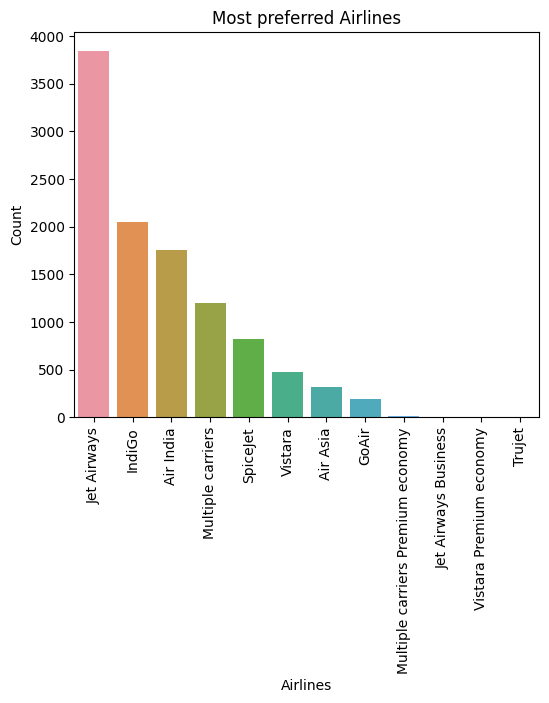

In [ ]:
#Most prefered Airlines.

plt.figure(figsize=(6,5))
sns.countplot(x="Airline", data=f_data,order = f_data['Airline'].value_counts().index)

plt.title("Most preferred Airlines")
plt.ylabel("Count")
plt.xlabel("Airlines")
plt.xticks(rotation= 90)
plt.show()

In [ ]:
# Price on Weekdays vs Weekends

days_df = f_data[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,2019-03-24,3897
1,Air India,2019-05-01,7662
2,Jet Airways,2019-06-09,13882
3,IndiGo,2019-05-12,6218
4,IndiGo,2019-03-01,13302


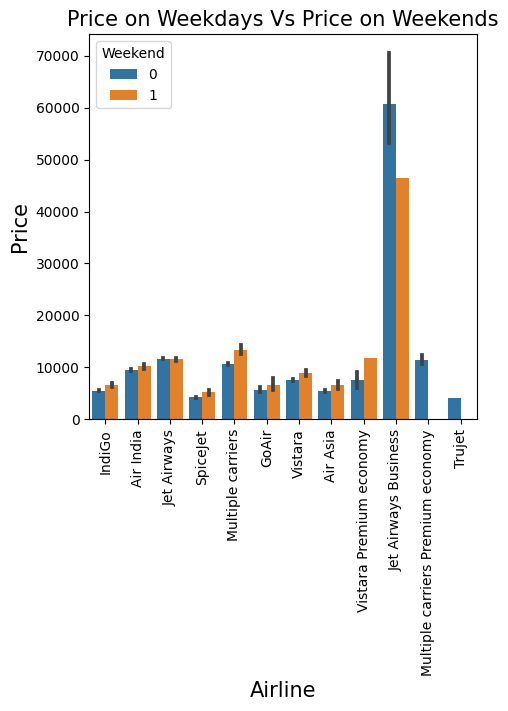

In [ ]:
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

plt.subplots(figsize=(5,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())

plt.show()

In [ ]:
# Now we drop 'Date_of_Journey' column

f_data.drop('Date_of_Journey',axis =1, inplace = True)

# **Insights**

* Jet airways Airline runs highest number of flights out of all flights.
* Very Few Premium class flights.
* price variation in flight tickets, indicating higher fares on weekends compared to weekdays.


---







In [ ]:
data = f_data[['Airline','Source','Destination','Total_Stops']]


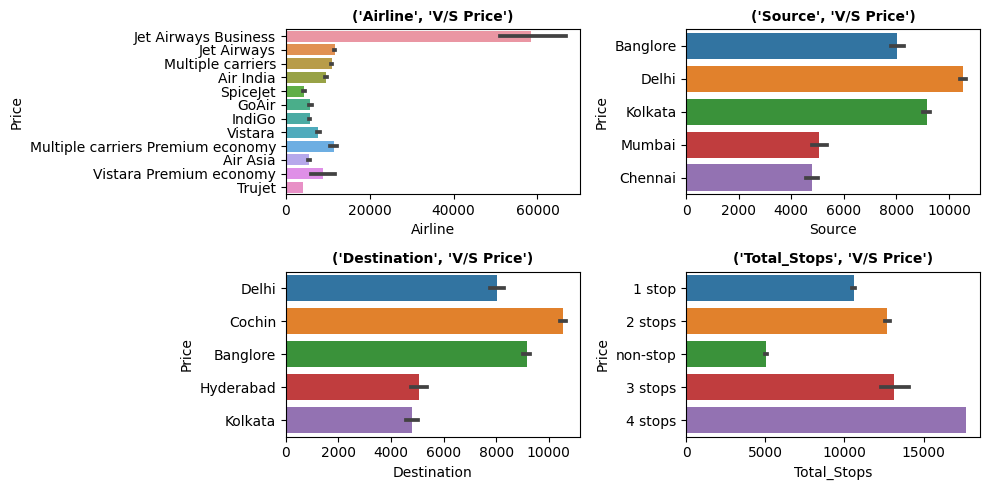

In [ ]:
# Check for Price Variation on different attributes.

plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber<=4:
    ax=plt.subplot(2,2,plotnumber)
    sns.barplot(x = 'Price', y= column, data = f_data.sort_values('Price', ascending = False))
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Price',fontsize=10)
    title = (column,"V/S Price")
    plt.title(title, fontsize=10, fontweight="bold")
  plotnumber+=1
plt.tight_layout()

## **Insights**

 * Among the various airlines, Jet Airways Business tickets are observed to have the highest ticket price and Turjet have the lowest ticket price.
 * The graph indicates that Delhi has the highest ticket price for the specified route, while Cochin represents the destination with the highest ticket price.
 * Furthermore, it is evident that the total number of stops is positively correlated with the ticket price, as flights with more total stops tend to have higher ticket prices.


---








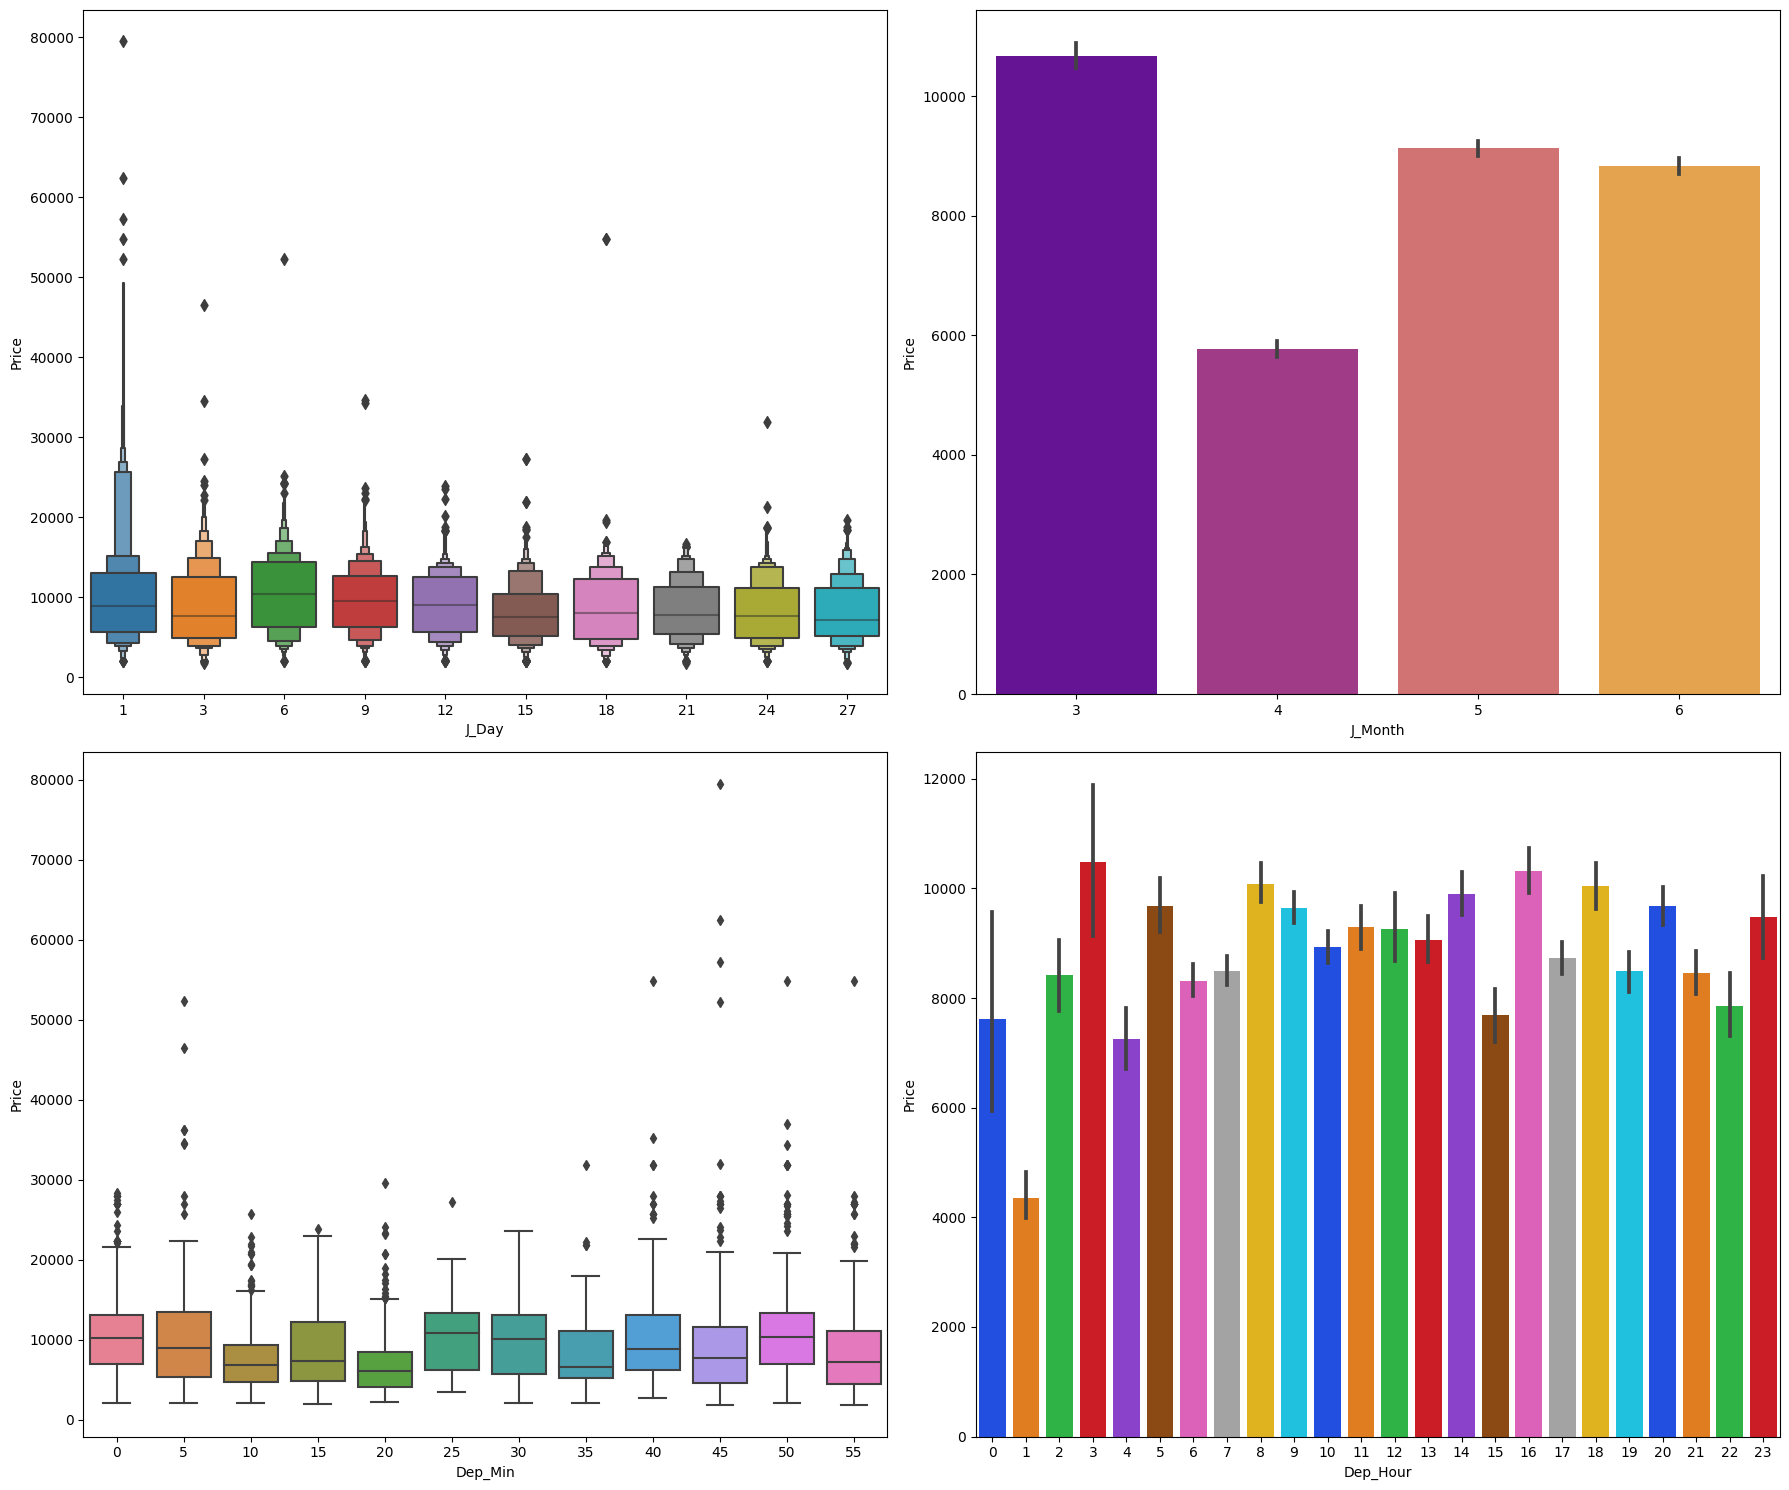

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(18,15))

# Checking relation between Journey_Day and Price
sns.boxenplot(x='J_Day',y='Price',ax = axes[0,0],data=f_data)

# Checking relation between Journey_Month and Price
sns.barplot(x='J_Month',y='Price',ax = axes[0,1],data=f_data,palette='plasma')

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=f_data,palette='husl')

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=f_data,palette="bright")
plt.show()

#### **Insights**
- Airfare is high on Day 3 followed by Day 18.
- January month are most expensive than others while airfare least expensive in April month.


---







## **Checking Outliers**

In [ ]:
# Fetch only Numerical columns

Numeric_Col = f_data.select_dtypes(include = [int,float])
Num_col = ['Price', 'J_Day', 'J_Month', 'Duration_hours', 'Duration_mins', 'Arrival_Hour', 'Arrival_Min', 'Dep_Hour', 'Dep_Min']
Num_col

['Price',
 'J_Day',
 'J_Month',
 'Duration_hours',
 'Duration_mins',
 'Arrival_Hour',
 'Arrival_Min',
 'Dep_Hour',
 'Dep_Min']

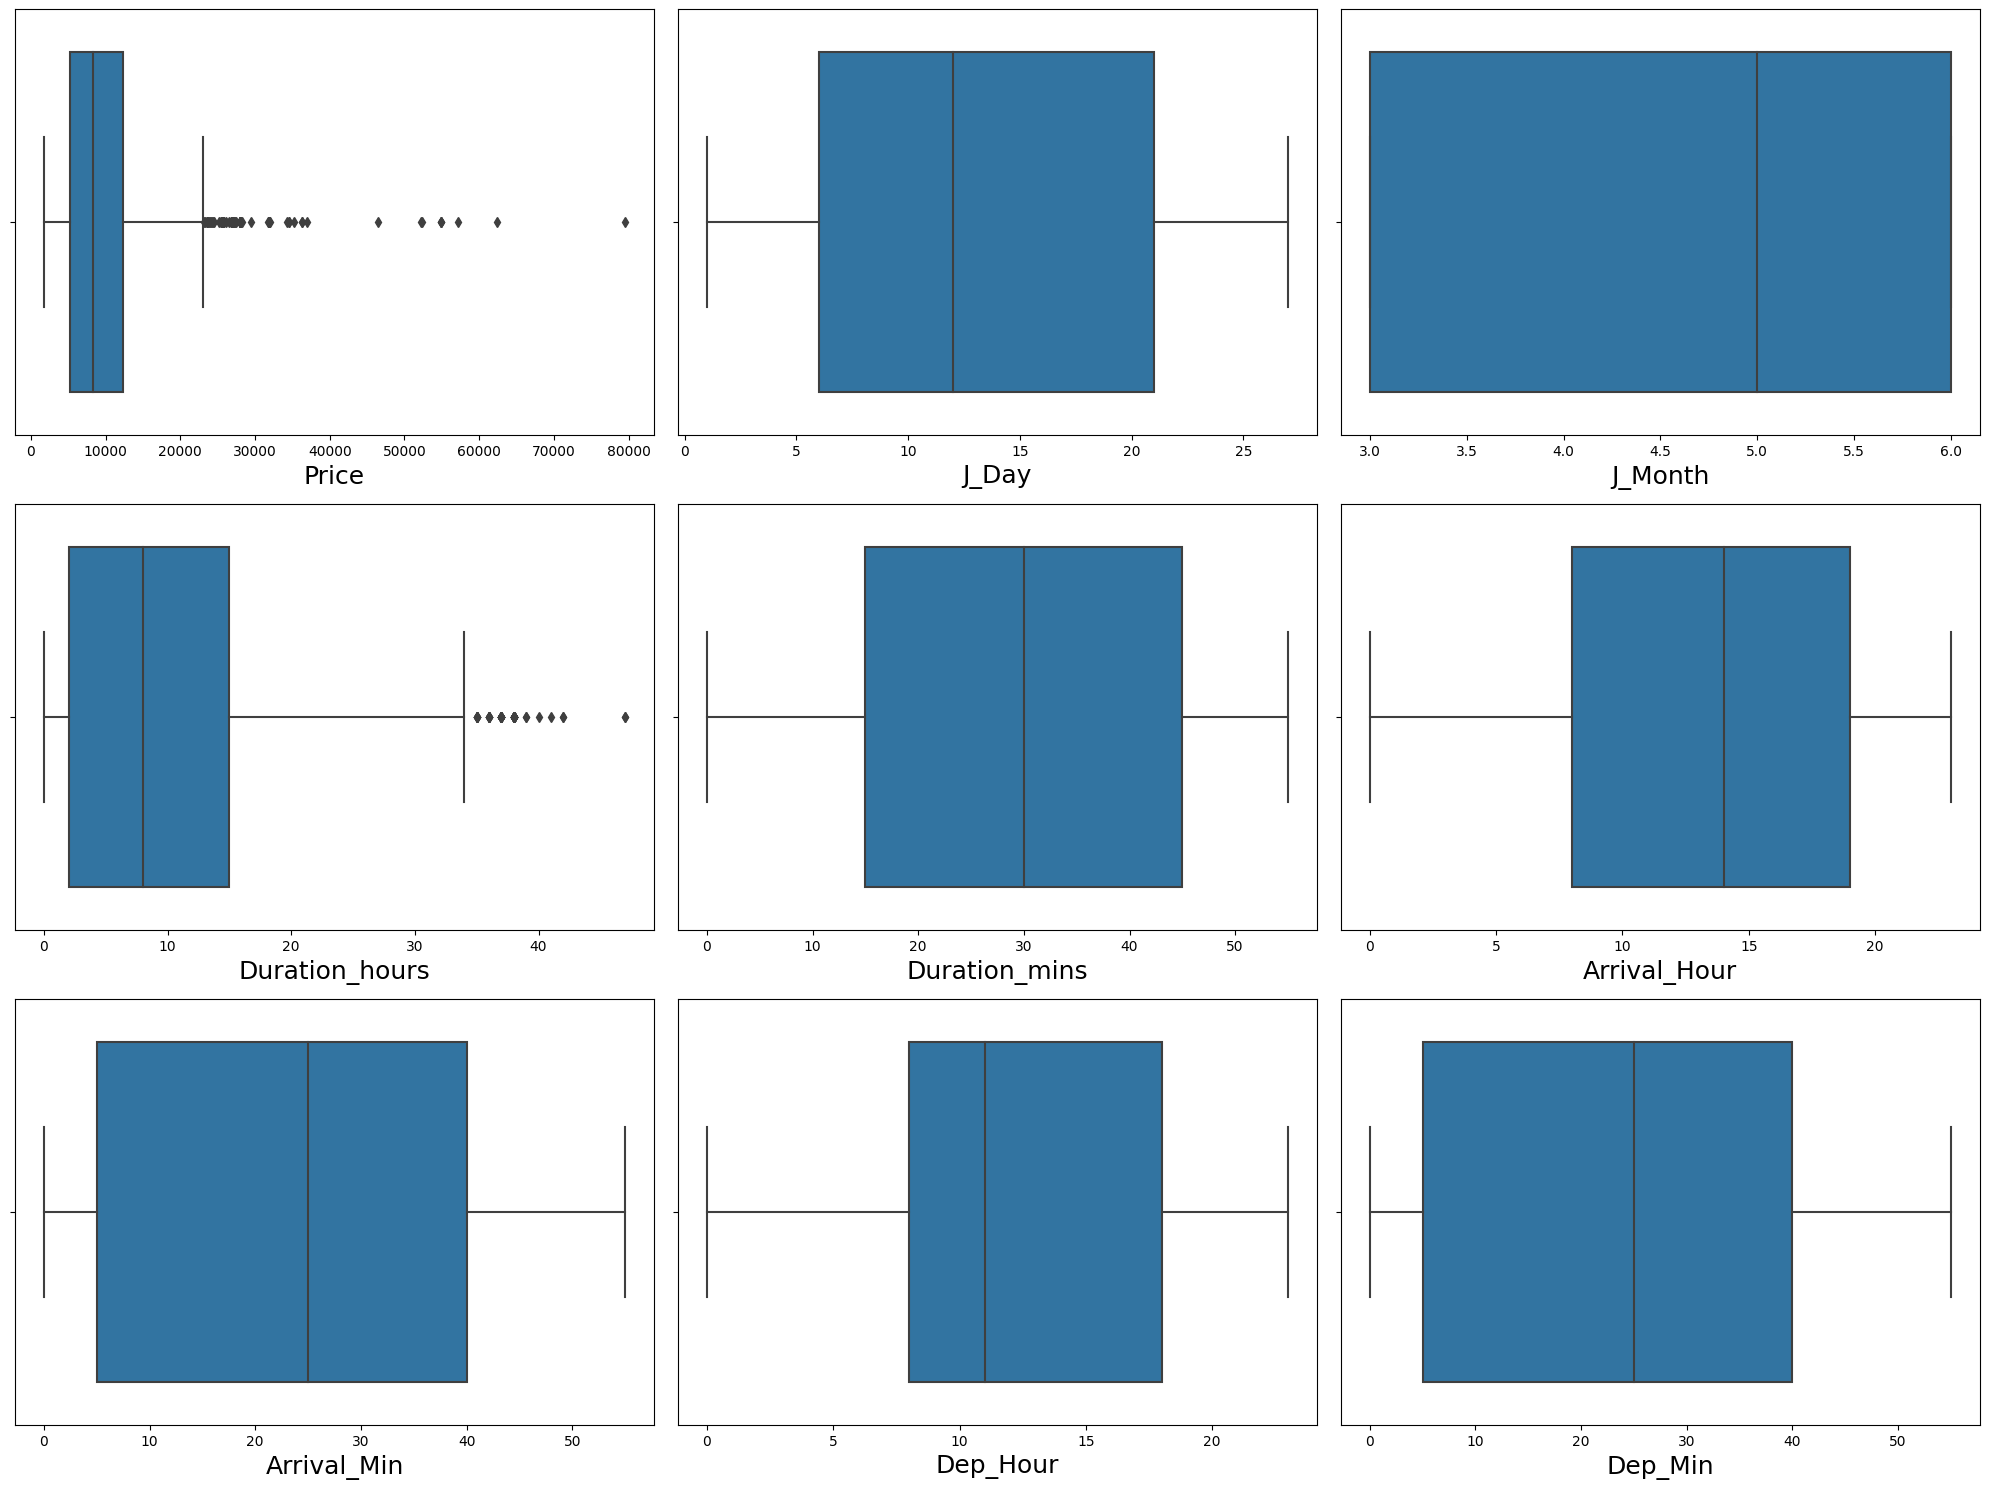

In [ ]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in Num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x = f_data[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

## **Insights**
* Upon analyzing the dataset, it becomes evident that there are outliers present in the 'Price' and 'Duration_hours' columns.


---



## **Handling outliers of Price and Duration_hours**

lower_limit =  -5367.0 , upper_limit =  23017.0
Percentage of Outliers for Price is =  0.008799026490686137


<Axes: xlabel='Price'>

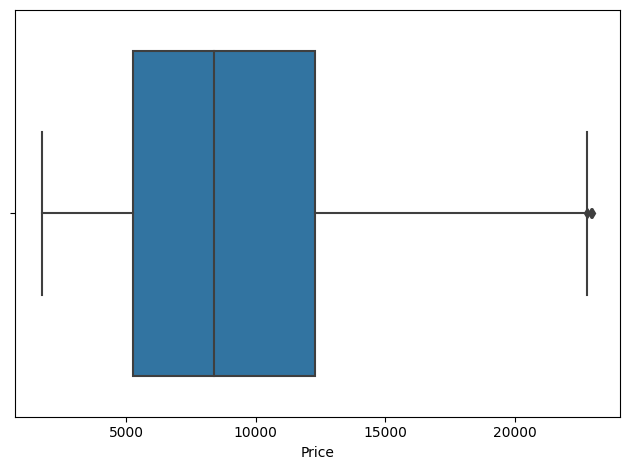

In [ ]:
# Finding upper_limit and lower_limit for Price

Q1 = f_data.Price.quantile(0.25)
Q3 = f_data.Price.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("lower_limit = ",lower_limit , "," , "upper_limit = ",upper_limit)

# Finding percentage of outlier for Price, if % < 0.05 then imputing outliers with median since Price is not normal.
PP = len(f_data.loc[(f_data.Price > upper_limit)])/len(f_data)
print("Percentage of Outliers for Price is = ", PP)

# Handle outliers by replacing data with Median as it is below 5%
f_data.loc[f_data['Price']>upper_limit,'Price'] = f_data['Price'].median()

# re-checking ouliers with boxplot.
sns.boxplot(x = f_data['Price'])

lower_limit =  -17.5 , upper_limit =  34.5
Percentage of Outliers for Duration_hours is =  0.006833286530000936


<Axes: xlabel='Duration_hours'>

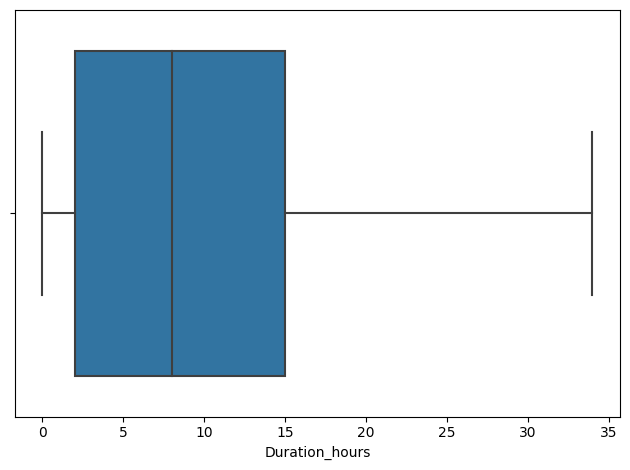

In [ ]:
# Finding upper_limit and lower_limit for Duration_hours

Q1 = f_data.Duration_hours.quantile(0.25)
Q3 = f_data.Duration_hours.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("lower_limit = ",lower_limit , "," , "upper_limit = ",upper_limit)

# Finding percentage of outlier for Duration_hours, if % < 0.05 then imputing outliers with median since Duration_hours is not normal.
DP = len(f_data.loc[(f_data.Duration_hours > upper_limit)])/len(f_data)
print("Percentage of Outliers for Duration_hours is = ", DP)

# Handle outliers by replacing data with Median as it is below 5%
f_data.loc[f_data['Duration_hours']>upper_limit,'Duration_hours'] = f_data['Duration_hours'].median()

# re-checking ouliers with boxplot.
sns.boxplot(x = f_data['Duration_hours'])

## **Converting Categorical Data into Numerical**


---






In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = f_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = f_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = f_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

f_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

f_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
# Concatenate dataframe --> f_data + Airline + Source + Destination

data_train = pd.concat([f_data, Airline, Source, Destination], axis = 1)

In [ ]:
# Drop the columns "Airline", "Source", "Destination, Duration"

data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data_train.drop('Duration',axis =1,inplace=True)

In [ ]:

data_train

,Total_Stops,Price,J_Day,J_Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,1,20,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,13,50,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,23,5,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,21,50,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,22,55,19,55,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,0,4145,27,4,23,45,20,45,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,0,7229,27,4,11,20,8,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,14,30,11,30,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'J_Day', 'J_Month', 'Arrival_Hour',
       'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [ ]:
X = data_train.loc[:, ['Total_Stops','J_Day', 'J_Month', 'Arrival_Hour',
       'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]
X.head()

,Total_Stops,J_Day,J_Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,1,20,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,13,50,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,23,5,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,21,50,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = data_train.iloc[:, 1]
y.head()


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# **Cheking Multicollinearity**


---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

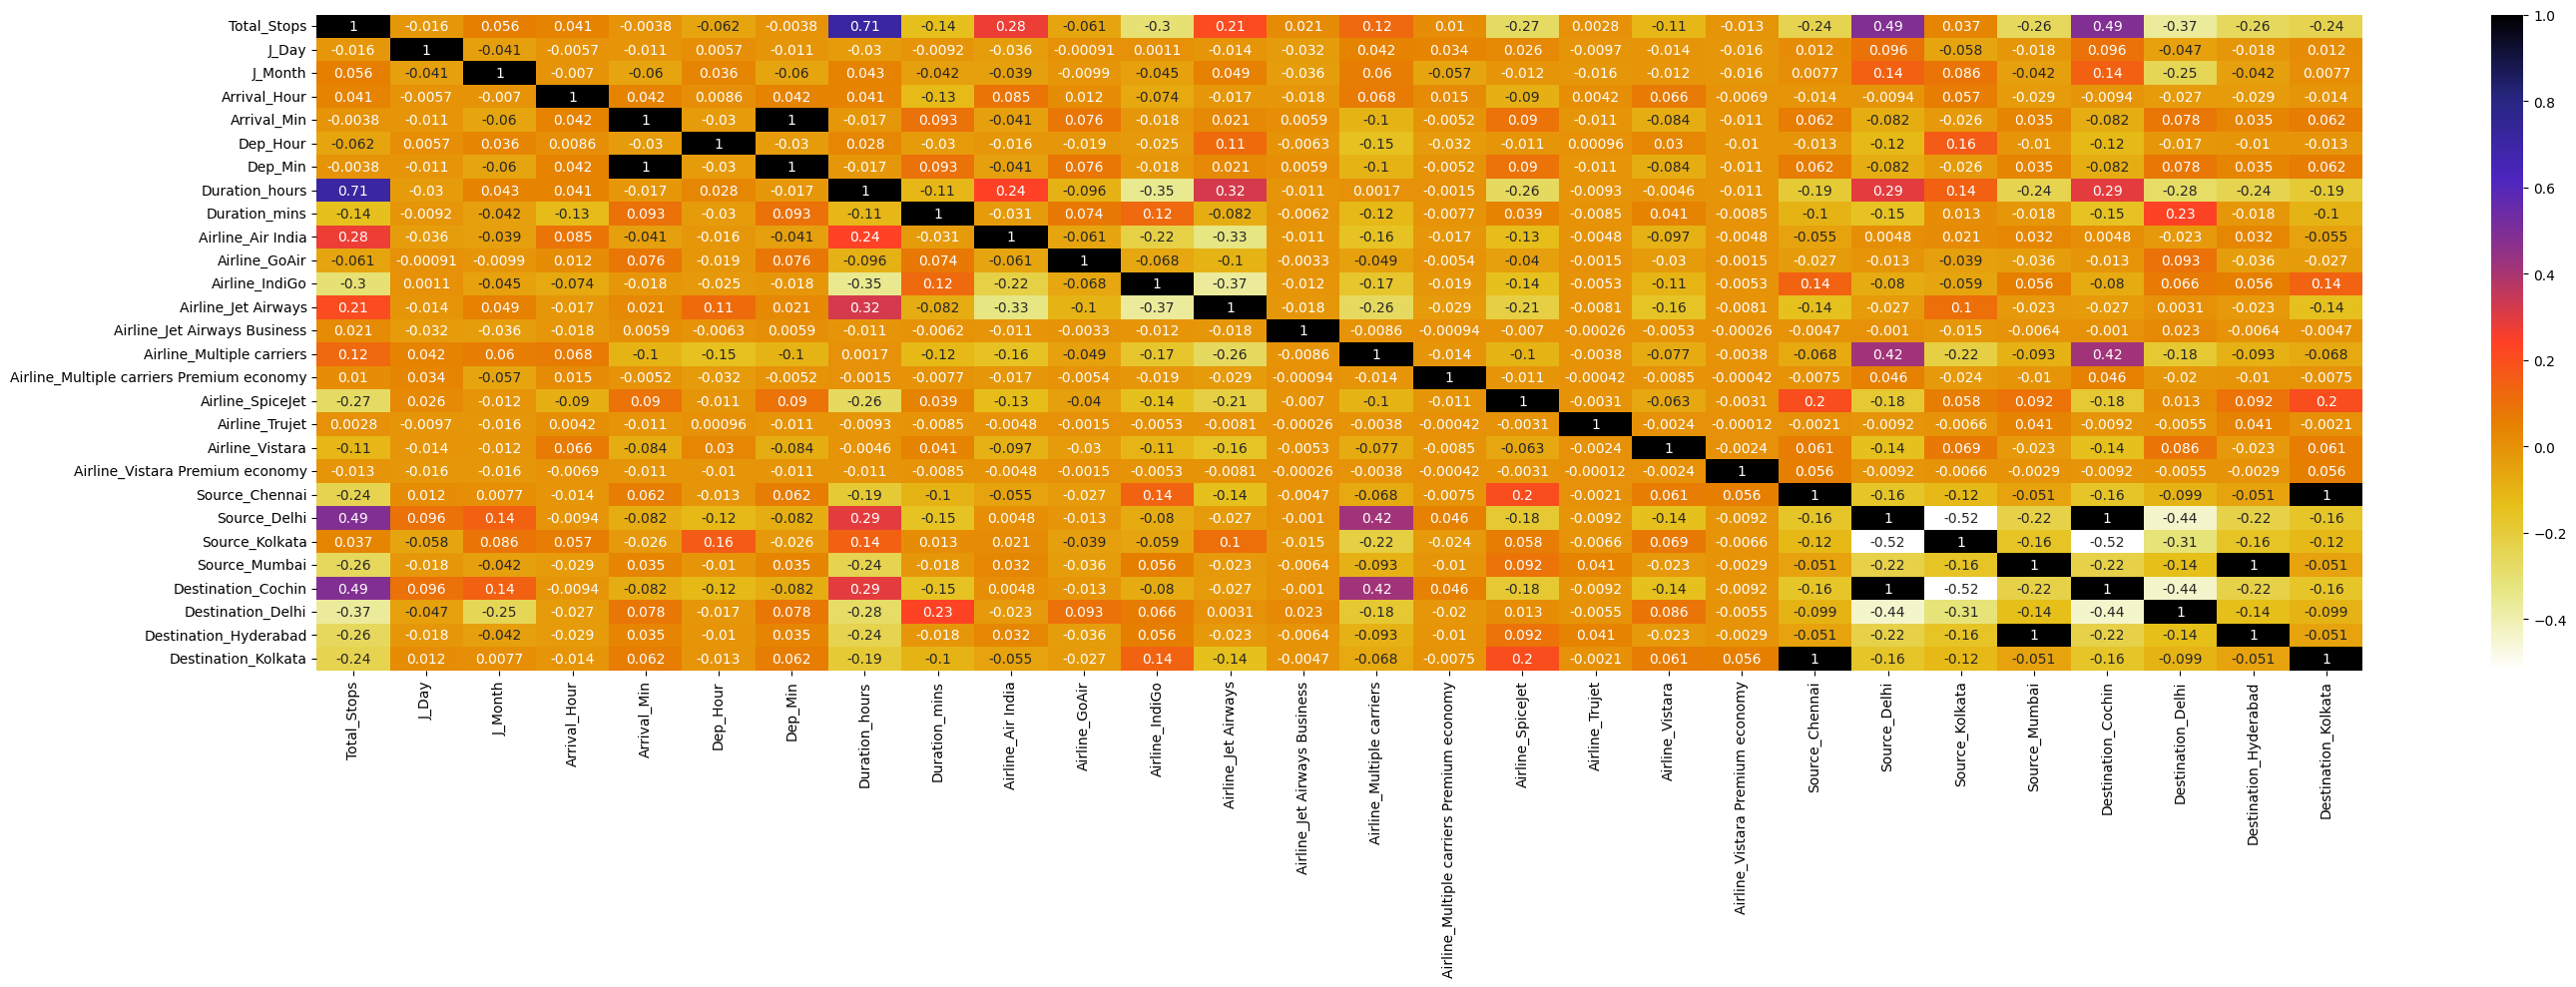

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(29,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

5

In [ ]:
corr_features


{'Dep_Min',
 'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Duration_hours'}

In [ ]:
X = X.drop(columns = ['Dep_Min',
 'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Duration_hours'],axis=1)
X.head()

,Total_Stops,J_Day,J_Month,Arrival_Hour,Arrival_Min,Dep_Hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi
0,0,24,3,1,20,22,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,13,50,5,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,9,6,4,25,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,12,5,23,5,18,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,3,21,50,16,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## **Scaling**

In [ ]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


df=data_train[['J_Day',	'J_Month'	,'Arrival_Hour',	'Arrival_Min',	'Dep_Hour'	,	'Duration_mins','Total_Stops']]
data1 = scaler.fit_transform(df)
data2 = pd.DataFrame(data1)
data2.rename({0:'J_Day',	1:'J_Month'	,2:'Arrival_Hour',	3:'Arrival_Min',	4:'Dep_Hour',	 5:'Duration_mins',6:'Total_Stops'},axis = 1,inplace = True)

In [ ]:
data_train.drop(['J_Day',	'J_Month'	,'Arrival_Hour',	'Arrival_Min',	'Dep_Hour'	,'Dep_Min',	'Duration_hours', 'Duration_mins','Total_Stops'],axis = 1)

,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,4145,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,7229,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,12648,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
data_train1 = pd.concat([data2,data_train],axis = 1)
data_train1.head(2)

,J_Day,J_Month,Arrival_Hour,Arrival_Min,Dep_Hour,Duration_mins,Total_Stops,Total_Stops,Price,J_Day,J_Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1.237383,-1.467490,-1.800427,-0.235050,1.654259,1.279008,-1.220744,0,3897,24,3,1,20,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.475239,0.250276,-0.050851,1.363492,-1.303095,-0.196388,1.741483,2,7662,1,5,13,50,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## **Split a data into x and y**

In [ ]:
x = data_train1.drop("Price",axis=1)
y = data_train1["Price"]

# **Linear Regression**


---







In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=52)

# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y-train
model.fit(x_train,y_train)

# make predictions
y_pred=model.predict(x_test)
print("y_prediction is  ",y_pred)

# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# MSE
MSE=mean_squared_error(y_test,y_pred)
print("MSE = ",MSE)

# MAE
MAE=mean_absolute_error(y_test,y_pred)
print("MAE = ",MAE)

# RMSE
rmse=np.sqrt(MSE)
print("RMSE = ",rmse)

# r2_score
l_r2 = r2_score(y_test,y_pred)
print("R2_Score = ",l_r2)


y_prediction is   [ 7271.20214684 12651.19858307  6185.78442099 ... 12321.01272975
  6869.31809461 10133.05568507]
MSE =  6038577.727553526
MAE =  1827.3496955452633
RMSE =  2457.351771227214
R2_Score =  0.6338405724625793


In [ ]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = r2_score(y_test,y_pred)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print("adj_r2 = ",adj_r2(x_test,y_test))

adj_r2 =  0.6297965270337975


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
8977,7191,7271.202147,-80.202147
4418,13344,12651.198583,692.801417
4393,5403,6185.784421,-782.784421
972,10112,7285.165877,2826.834123
5658,3873,3747.592605,125.407395
...,...,...,...
466,5618,5972.411160,-354.411160
10148,7398,8204.742419,-806.742419
8374,13502,12321.012730,1180.987270
7737,5830,6869.318095,-1039.318095


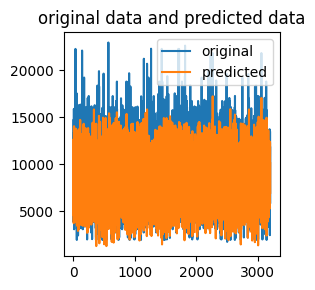

In [ ]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(3,3),facecolor='white')
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

## **Random Forest Regression**
---







In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 52)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.947915535883155

In [ ]:
reg_rf.score(X_test, y_test)

0.81717467820892

## **Hyperparameter** **Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=52, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=52, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators=1200,min_samples_split= 5,min_samples_leaf=1,max_features='auto',
 max_depth=10)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_split=5,
                      n_estimators=1200)

In [ ]:
y_pred= reg_rf.predict(x_test)
y_pred

array([ 6891.39613309, 14307.01041491,  5460.96107237, ...,
       15443.59178237,  4981.90121798, 10809.79438612])

In [ ]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = reg_rf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
rf_r2_score=r2_score(y_test,y_pred)
rf_r2_score

0.83303023963553

In [ ]:
adj_r2(X_test,y_test)

0.8311861431972982

In [ ]:
import sklearn.metrics as metrics


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



MAE: 1188.6531261786567
MSE: 2753608.948137206
RMSE: 1659.4001772138047


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
8977,7191,6891.396133,299.603867
4418,13344,14307.010415,-963.010415
4393,5403,5460.961072,-57.961072
972,10112,9481.327183,630.672817
5658,3873,3885.233369,-12.233369
...,...,...,...
466,5618,5173.628681,444.371319
10148,7398,6294.564644,1103.435356
8374,13502,15443.591782,-1941.591782
7737,5830,4981.901218,848.098782


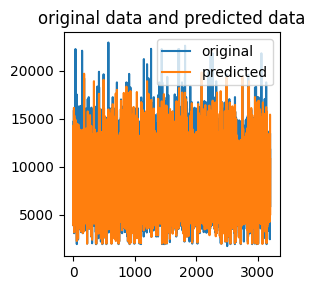

In [ ]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(3,3),facecolor='white')
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

# **Bagging Regressor**


---







In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=52)

# Create a base regressor (DecisionTreeRegressor) for bagging
base_regressor = DecisionTreeRegressor()

# Create the BaggingRegressor
bagging_regressor = BaggingRegressor(base_estimator=base_regressor,
                                     n_estimators=20,  # Number of base estimators
                                     random_state=42)

# Fit the BaggingRegressor to the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)
print("y_prediction ",y_pred)


# Evaluate the model
# MSE
MSE=mean_squared_error(y_test,y_pred)
print("MSE = ",MSE)

# MAE
MAE=mean_absolute_error(y_test,y_pred)
print("MAE = ",MAE)

# RMSE
rmse=np.sqrt(MSE)
print("RMSE = ",rmse)

# r2_score
ba_r2 = r2_score(y_test,y_pred)
print("R2_Score = ",ba_r2)

y_prediction  [ 6809.         14189.19583333  4941.         ... 14770.65
  5063.78333333 11600.45      ]
MSE =  3129196.581845194
MAE =  1153.0976385922104
RMSE =  1768.9535273277234
R2_Score =  0.8102558448767879


In [ ]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = r2_score(y_test,y_pred)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print("adj_r2 = ",adj_r2(X_test,y_test))

adj_r2 =  0.8081602167829689


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
8977,7191,6809.000000,382.000000
4418,13344,14189.195833,-845.195833
4393,5403,4941.000000,462.000000
972,10112,9391.750000,720.250000
5658,3873,3847.400000,25.600000
...,...,...,...
466,5618,5334.900000,283.100000
10148,7398,6135.950000,1262.050000
8374,13502,14770.650000,-1268.650000
7737,5830,5063.783333,766.216667


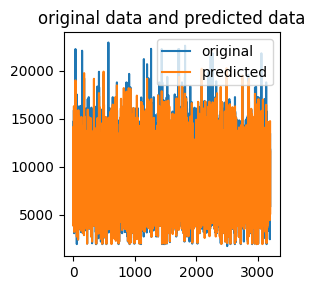

In [ ]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(3,3),facecolor='white')
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

## **Gradient Boosting Regressor**
---



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation



In [ ]:
gbm=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150) ## object creation

In [ ]:
gbm.fit(X_train,y_train) ## fitting the data

GradientBoostingRegressor(n_estimators=150)

In [ ]:
gbm.score(X_test,y_test)

0.7714218808055997

In [ ]:
y_pred=gbm.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250]}
tuning= GridSearchCV(estimator=gbm, param_grid=LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_


{'learning_rate': 0.15, 'n_estimators': 250}

In [ ]:
LR={'learning_rate':[0.15],'n_estimators':[250]}
tuning= GridSearchCV(estimator=gbm, param_grid=LR, scoring='r2')
tuning.fit(X_train,y_train)

gbm_r2_score=r2_score(y_test,y_pred)
gbm_r2_score

0.7714218808055997

In [ ]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = gbm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
adj_r2(X_test,y_test)


0.7688973512468101

In [ ]:
y_gbm=gbm.predict(X_test)
y_gbm

array([ 6435.07179636, 14521.4712779 ,  6233.81985076, ...,
       14819.20662054,  5258.04723696, 10403.91931764])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print('MAE:', metrics.mean_absolute_error(y_test, y_gbm))
print('MSE:', metrics.mean_squared_error(y_test,y_gbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_gbm)))

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


MAE: 1448.957959675553
MSE: 3769633.21375173
RMSE: 1941.5543293330038


,Actual Value,Predicted Value,Difference
8977,7191,6435.071796,755.928204
4418,13344,14521.471278,-1177.471278
4393,5403,6233.819851,-830.819851
972,10112,6918.442956,3193.557044
5658,3873,3980.836655,-107.836655
...,...,...,...
466,5618,6729.020520,-1111.020520
10148,7398,5518.122396,1879.877604
8374,13502,14819.206621,-1317.206621
7737,5830,5258.047237,571.952763


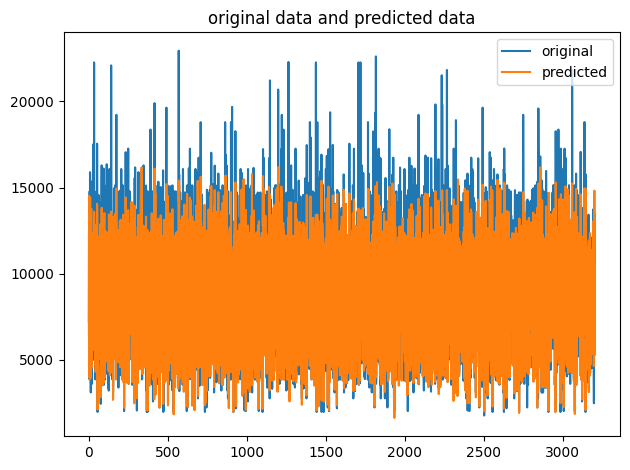

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

## **Decision Tree Regressor**


---



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

r2_score(y_pred,y_test)

0.6995745892478242

In [ ]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()


from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')


print(regressorcv.fit(X_train,y_train))

print(regressorcv.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')
{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'random'}


In [ ]:
y_pred=regressorcv.predict(X_test)


In [ ]:
D2_r2_score=r2_score(y_pred,y_test)
D2_r2_score

0.7417670581718069

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print('MAE:', metrics.mean_absolute_error(y_test, y_gbm))
print('MSE:', metrics.mean_squared_error(y_test,y_gbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_gbm)))

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

MAE: 1448.957959675553
MSE: 3769633.21375173
RMSE: 1941.5543293330038


,Actual Value,Predicted Value,Difference
8977,7191,6479.884956,711.115044
4418,13344,14075.333333,-731.333333
4393,5403,6509.000000,-1106.000000
972,10112,9805.111111,306.888889
5658,3873,3891.347305,-18.347305
...,...,...,...
466,5618,4916.230769,701.769231
10148,7398,5709.225806,1688.774194
8374,13502,17672.064516,-4170.064516
7737,5830,5125.055556,704.944444


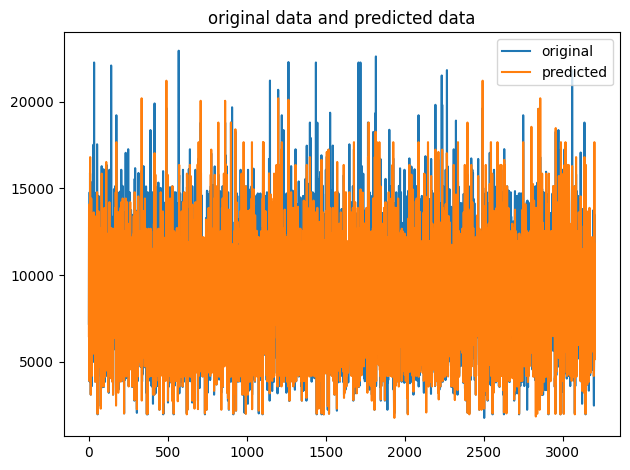

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

## **Model Comparing**


---







In [ ]:
Model_compare = pd.DataFrame({'Linear Regression': [l_r2],'Bagging Regressor':[ba_r2],'Random Forest Regression':[rf_r2_score],
                              'Gradient Boosting Regression':[gbm_r2_score],'Decision Tree Regression':[D2_r2_score],},index = ["R2_Score"])
Model_compare

,Linear Regression,Bagging Regressor,Random Forest Regression,Gradient Boosting Regression,Decision Tree Regression
R2_Score,0.633841,0.810256,0.83303,0.771422,0.741767


## **Saving the model for Reuse it**


---







In [ ]:
import pickle
# Open a file  where we want to store the data
file = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(reg_rf,file)

model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

y_prediction = forest.predict(X_test)
metrics.r2_score(y_test,y_prediction)

0.83303023963553



---



---


# **Final Report**

* R2_Score measure the accuracy of our model and find the goodness of best fit line.
* The mean square error is difference between actual value and predicted value.
* From these results,it is found that Random Forest regression(R2_Score,Mean square error) is the best model.
* If our r2_score is 0.83 it means that 83% of variance in output column is explained by input columns.
* Finally we concluded that Random Forest regression(83%) is the best model and suitable result for Flight Price Prediction Analysis.


---


###**Challanges faced on the Data**
* In dataset, some of the features like Route,Additional_info is not required,so Drop this feature.
Additional_Info contains almost 80% no_info
Route and Total_Stops are related to each other.
* we have to convert this datatype(Object to integer),as to use this column properly for prediction
* Handling Outliers with IQR Method.
* Handling Categorical Data-
One can find many ways to handle categorical data. Some of them categorical data are,
* Nominal data --> data are not in any order --> OneHotEncoder is used in this case
* Ordinal data --> data are in order --> LabelEncoder is used in this case
* Stabdard Scaling is done.
* Based on the statistical test(Correlation), we drop the feature : Destination_Cochin','Destination_Hyderabad','Destination_Kolkata','Duration_hours,Dep_mins'
* To find the optimal number of parameters for this particular data-Use Hyperparameter tuning
*To find the goodness of best fit line-Use R2_score


---

